In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
import vis ## keras-vis
import matplotlib.pyplot as plt
import numpy as np
print("keras      {}".format(keras.__version__))
print("tensorflow {}".format(tf.__version__))
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

keras      2.3.0-tf
tensorflow 2.2.0
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
model_binary = keras.models.load_model('/content/drive/My Drive/w210_capstone/Chest.AI/final_images_models/model_deploy/binary_model_7.h5') 
model_multiclass = keras.models.load_model('/content/drive/My Drive/w210_capstone/Chest.AI/final_images_models/model_deploy/multiClass_model_22.h5') 


In [ ]:
img_location = '/content/drive/My Drive/w210_capstone/balance_set_age_local/Cardiomegaly/00000001_000.png'

from keras.preprocessing.image import load_img, img_to_array
# test_img = load_img(img_location,target_size=(224,224))

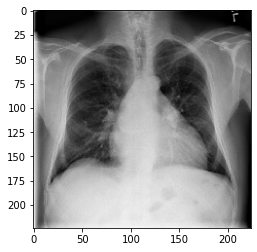

In [ ]:
# img_location = '/content/drive/My Drive/w210_capstone/GradCamBBox/cardiomegaly_infiltration.png'
img_location = '/content/drive/My Drive/w210_capstone/balance_set_age_local/Cardiomegaly/00000001_000.png'

from keras.preprocessing.image import load_img, img_to_array
_img = load_img(img_location,target_size=(224,224))
plt.imshow(_img)
plt.show()

No handles with labels found to put in legend.


[5 3 1 0 6]


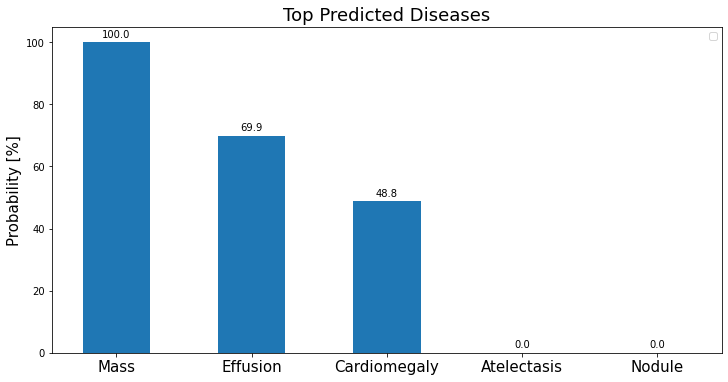

In [ ]:
from keras.preprocessing import image
test_image = image.load_img(img_location, target_size = (224, 224)) 
# plt.imshow(test_image)
# plt.show()
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

class_label = ['Atelectasis','Cardiomegaly','Consolidation','Effusion','Infiltration', 'Mass','Nodule','Pleural_Thickening']

# tier 1 prediction
y_pred_binary = model_binary.predict(test_image)
if np.argmax(y_pred_binary[0]) == 0:
  y_pred_binary = model_binary.predict(test_image)
  class_idxs_sorted = np.argsort(y_pred_binary.flatten())[::-1]
  # class_idxs_sorted = class_idxs_sorted[:2]
  # print(class_idxs_sorted)
  fig = plt.figure(figsize=(12,6))
  ax = fig.add_subplot(111)
  rects1 = ax.bar(np.arange(2),[y_pred_binary.flatten()[i]*100 for i in class_idxs_sorted],0.5)
  ax.set_ylabel('Probability [%]', fontsize=15)
  ax.set_title('Chest Health Prediction', fontsize=18)
  ax.set_xticks(np.arange(2))
  ax.set_xticklabels([['Normal','Disease'][i] for i in class_idxs_sorted], fontsize=15)
  ax.legend()
  # for i, idx in enumerate(class_idxs_sorted[:topNclass]):
  #     print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
  #           i + 1, class_label[idx],idx,y_pred[0,idx])) #change between classlabel and binary_label
  def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


  autolabel(rects1)

else:
  # print(np.argmax(y_pred_binary[0]))
  y_pred_multiclass = model_multiclass.predict(test_image)
  class_idxs_sorted = np.argsort(y_pred_multiclass.flatten())[::-1]
  topNclass = 5
  class_idxs_sorted = class_idxs_sorted[:topNclass]
  print(class_idxs_sorted)
  fig = plt.figure(figsize=(12,6))
  ax = fig.add_subplot(111)
  rects1 = ax.bar(np.arange(5),[y_pred_multiclass.flatten()[i]*100 for i in class_idxs_sorted],0.5)
  ax.set_ylabel('Probability [%]', fontsize=15)
  ax.set_title('Top Predicted Diseases', fontsize=18)
  ax.set_xticks(np.arange(5))
  ax.set_xticklabels([class_label[i] for i in class_idxs_sorted], fontsize=15)
  ax.legend()
  # for i, idx in enumerate(class_idxs_sorted[:topNclass]):
  #     print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
  #           i + 1, class_label[idx],idx,y_pred[0,idx])) #change between classlabel and binary_label
  def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


  autolabel(rects1)

  # output image name
  # import regex as re
  # list_temp = re.split()
image_id = '00000001_000'
plt.savefig('/content/drive/My Drive/w210_capstone/'+image_id+'_barplot.png')

In [ ]:
[y_pred_multiclass.flatten()[i]*100 for i in class_idxs_sorted]

[99.9998688697815,
 69.90857124328613,
 48.78958761692047,
 9.877670513122605e-11,
 2.0929799487668924e-16]

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(12,6))
ax = sns.barplot(x=[y_pred_multiclass.flatten()[i]*100 for i in class_idxs_sorted], y=[class_label[i] for i in class_idxs_sorted], 
                   palette="colorblind")
ax.set_yticklabels([class_label[i] for i in class_idxs_sorted], fontsize=15)
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["left"].set_visible(False)
ax.get_xaxis().set_visible(False)
for i in range(len([class_label[i] for i in class_idxs_sorted])):
    ax.text([y_pred_multiclass.flatten()[i]*100 for i in class_idxs_sorted][i]+1, i,
            round([y_pred_multiclass.flatten()[i]*100 for i in class_idxs_sorted][i],1), color='black', ha="left", fontsize=12)
# ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
# 

NameError: ignored

<Figure size 864x432 with 0 Axes>

In [ ]:
'''Loop'''
last_conv_layer_name = 'conv5_block16_concat' 
classifier_layer_names = ['bn', 'relu', 'flatten', 'dense'] 
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

# last_conv_layer_model.summary()

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
classifier_input
x = classifier_input
for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

# classifier_model.summary()
''' start here '''
for j in list(class_idxs_sorted):
  with tf.GradientTape() as tape:
      last_conv_layer_output = last_conv_layer_model(test_image)
      tape.watch(last_conv_layer_output)
      preds = classifier_model(last_conv_layer_output)
      # top_pred_index = tf.argmax(preds[0])
      # print(top_pred_index)
      top_class_channel = preds[:, j]

  grads = tape.gradient(top_class_channel, last_conv_layer_output)
  # print(grads)
  pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
  # pooled_grads
  last_conv_layer_output = last_conv_layer_output.numpy()[0]
  # last_conv_layer_output
  pooled_grads = pooled_grads.numpy()
  pooled_grads
  for i in range(pooled_grads.shape[-1]):
      last_conv_layer_output[:, :, i] *= pooled_grads[i]
  # last_conv_layer_output
  heatmap = np.mean(last_conv_layer_output, axis=-1)
  # heatmap
  heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
  img = image.load_img(img_location, target_size = (256, 256)) 
  img = image.img_to_array(img)
  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)
  if np.sum(heatmap.flatten()) == 0:
    continue
  else:
    break

''' until here '''
# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "/content/drive/My Drive/"+current_disease+"-test.png"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))


tf.Tensor(5, shape=(), dtype=int64)


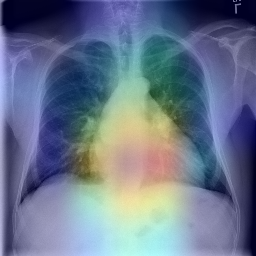

In [ ]:
last_conv_layer_name = 'conv5_block16_concat' 
classifier_layer_names = ['bn', 'relu', 'flatten', 'dense'] 
last_conv_layer = model_multiclass.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model_multiclass.inputs, last_conv_layer.output)

# last_conv_layer_model.summary()

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
classifier_input
x = classifier_input
for layer_name in classifier_layer_names:
    x = model_multiclass.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

# classifier_model.summary()

with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(test_image)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    print(top_pred_index)
    top_class_channel = preds[:, 5]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

# grads


pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# pooled_grads


last_conv_layer_output = last_conv_layer_output.numpy()[0]
# last_conv_layer_output

pooled_grads = pooled_grads.numpy()

# pooled_grads
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]

# last_conv_layer_output


heatmap = np.mean(last_conv_layer_output, axis=-1)
# heatmap

heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
# heatmap

# We load the original image
# img_path = '/content/drive/My Drive/xray_sample_train_only/Cardiomegaly/00001373_026.png'

# img = keras.preprocessing.image.load_img(img_path)
# img = keras.preprocessing.image.img_to_array(img)

img = image.load_img(img_location, target_size = (256, 256)) 
img = image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "/content/drive/My Drive/w210_capstone/"+image_id+'_heatmap.png'
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))